In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs2

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Write the Training Loop

118it [00:22,  5.31it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


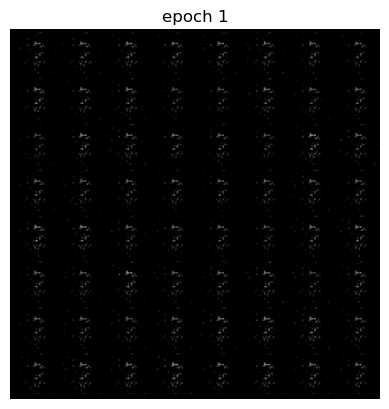

Epoch 1 of 100
Generator loss: 1.25107133, Discriminator loss: 0.93658721


118it [00:27,  4.25it/s]                         


Epoch 2 of 100
Generator loss: 1.96311641, Discriminator loss: 1.35761738


118it [00:30,  3.93it/s]                         


Epoch 3 of 100
Generator loss: 3.90869641, Discriminator loss: 0.65537375


118it [00:31,  3.79it/s]                         


Epoch 4 of 100
Generator loss: 1.49202085, Discriminator loss: 1.28128207


118it [00:29,  3.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


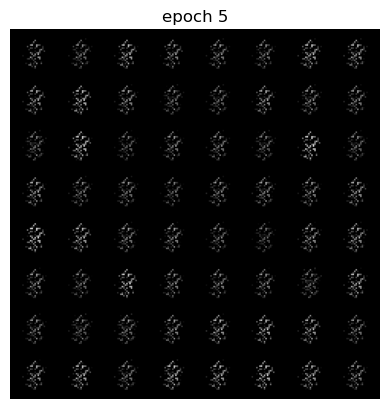

Epoch 5 of 100
Generator loss: 1.75513935, Discriminator loss: 1.14652693


118it [00:31,  3.76it/s]                         


Epoch 6 of 100
Generator loss: 2.05349469, Discriminator loss: 1.38069618


118it [00:30,  3.90it/s]                         


Epoch 7 of 100
Generator loss: 1.59010911, Discriminator loss: 1.19287360


118it [00:31,  3.74it/s]                         


Epoch 8 of 100
Generator loss: 1.74112535, Discriminator loss: 1.02639747


118it [00:31,  3.80it/s]                         


Epoch 9 of 100
Generator loss: 1.25911772, Discriminator loss: 1.05050159


118it [00:31,  3.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


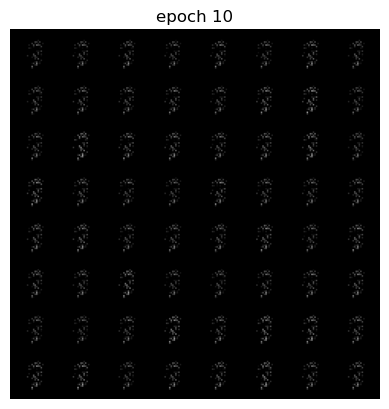

Epoch 10 of 100
Generator loss: 1.61110771, Discriminator loss: 1.10050428


118it [00:31,  3.80it/s]                         


Epoch 11 of 100
Generator loss: 2.09074736, Discriminator loss: 0.81970298


118it [00:31,  3.73it/s]                         


Epoch 12 of 100
Generator loss: 1.81556940, Discriminator loss: 1.12501788


118it [00:31,  3.72it/s]                         


Epoch 13 of 100
Generator loss: 1.61341822, Discriminator loss: 0.82661051


118it [00:33,  3.58it/s]                         


Epoch 14 of 100
Generator loss: 1.70520401, Discriminator loss: 0.82314342


118it [00:30,  3.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


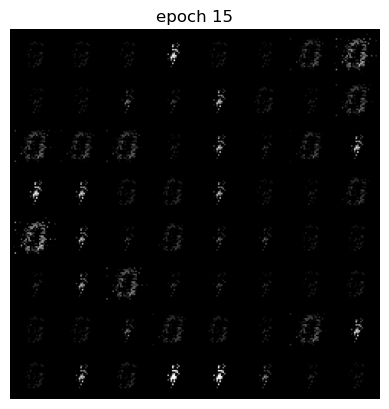

Epoch 15 of 100
Generator loss: 1.96406329, Discriminator loss: 0.81889486


118it [00:30,  3.85it/s]                         


Epoch 16 of 100
Generator loss: 2.11677766, Discriminator loss: 0.66468883


118it [00:30,  3.92it/s]                         


Epoch 17 of 100
Generator loss: 2.74777985, Discriminator loss: 0.49528927


118it [00:28,  4.21it/s]                         


Epoch 18 of 100
Generator loss: 3.62235498, Discriminator loss: 0.29756576


118it [00:27,  4.26it/s]                         


Epoch 19 of 100
Generator loss: 3.60813570, Discriminator loss: 0.26475954


118it [00:27,  4.26it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


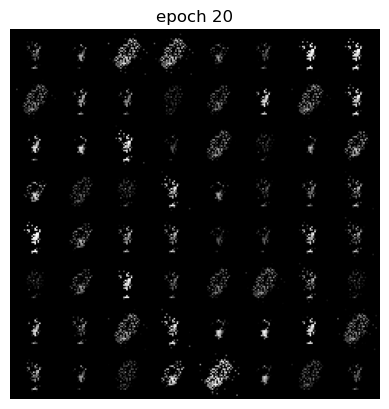

Epoch 20 of 100
Generator loss: 2.86097050, Discriminator loss: 0.68705291


118it [00:27,  4.28it/s]                         


Epoch 21 of 100
Generator loss: 4.23972368, Discriminator loss: 0.83588958


118it [00:27,  4.27it/s]                         


Epoch 22 of 100
Generator loss: 1.95920539, Discriminator loss: 0.69111162


118it [00:27,  4.29it/s]                         


Epoch 23 of 100
Generator loss: 3.00826383, Discriminator loss: 0.47755027


118it [00:28,  4.11it/s]                         


Epoch 24 of 100
Generator loss: 2.74756646, Discriminator loss: 0.62098724


118it [00:28,  4.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


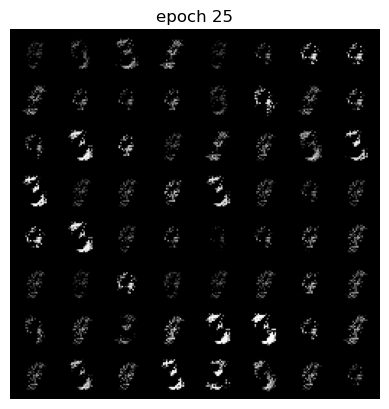

Epoch 25 of 100
Generator loss: 2.55750084, Discriminator loss: 0.48973292


118it [00:31,  3.70it/s]                         


Epoch 26 of 100
Generator loss: 2.69324613, Discriminator loss: 0.56297141


118it [00:30,  3.90it/s]                         


Epoch 27 of 100
Generator loss: 2.64582467, Discriminator loss: 0.61200476


118it [00:32,  3.64it/s]                         


Epoch 28 of 100
Generator loss: 2.59667349, Discriminator loss: 0.59316480


118it [00:28,  4.07it/s]                         


Epoch 29 of 100
Generator loss: 2.94920039, Discriminator loss: 0.52622193


118it [00:27,  4.34it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


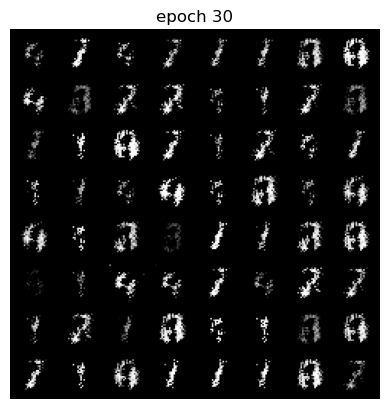

Epoch 30 of 100
Generator loss: 2.76773810, Discriminator loss: 0.57210541


118it [00:26,  4.38it/s]                         


Epoch 31 of 100
Generator loss: 2.97450995, Discriminator loss: 0.53646380


118it [00:27,  4.26it/s]                         


Epoch 32 of 100
Generator loss: 2.32235074, Discriminator loss: 0.60044229


118it [00:31,  3.79it/s]                         


Epoch 33 of 100
Generator loss: 2.80910683, Discriminator loss: 0.42621517


118it [00:28,  4.16it/s]                         


Epoch 34 of 100
Generator loss: 2.75724864, Discriminator loss: 0.60067755


118it [00:26,  4.40it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


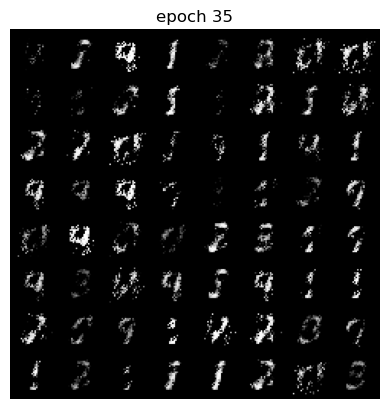

Epoch 35 of 100
Generator loss: 2.33025098, Discriminator loss: 0.61698484


118it [00:27,  4.28it/s]                         


Epoch 36 of 100
Generator loss: 2.63029718, Discriminator loss: 0.55381620


118it [00:28,  4.09it/s]                         


Epoch 37 of 100
Generator loss: 2.88438082, Discriminator loss: 0.59197938


118it [00:29,  3.95it/s]                         


Epoch 38 of 100
Generator loss: 2.65945649, Discriminator loss: 0.55559254


118it [00:27,  4.34it/s]                         


Epoch 39 of 100
Generator loss: 3.07316065, Discriminator loss: 0.48192343


118it [00:27,  4.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


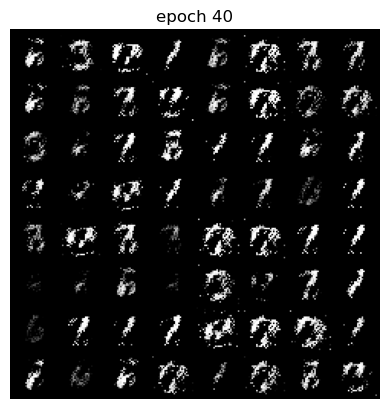

Epoch 40 of 100
Generator loss: 2.68802929, Discriminator loss: 0.59086430


118it [00:27,  4.34it/s]                         


Epoch 41 of 100
Generator loss: 2.66368222, Discriminator loss: 0.55807000


118it [00:27,  4.32it/s]                         


Epoch 42 of 100
Generator loss: 2.74666142, Discriminator loss: 0.54624671


118it [00:27,  4.36it/s]                         


Epoch 43 of 100
Generator loss: 2.57860374, Discriminator loss: 0.60211641


118it [00:26,  4.38it/s]                         


Epoch 44 of 100
Generator loss: 2.77222252, Discriminator loss: 0.54258096


118it [00:27,  4.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


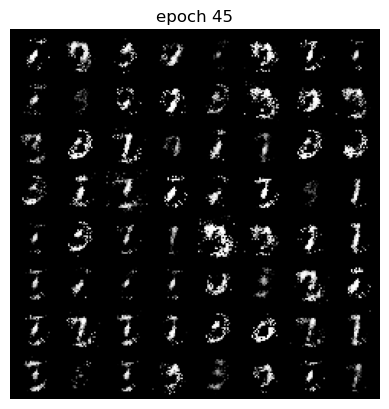

Epoch 45 of 100
Generator loss: 2.65610480, Discriminator loss: 0.55473089


118it [00:27,  4.30it/s]                         


Epoch 46 of 100
Generator loss: 2.38584161, Discriminator loss: 0.67348278


118it [00:27,  4.26it/s]                         


Epoch 47 of 100
Generator loss: 2.62119555, Discriminator loss: 0.56823289


118it [00:27,  4.33it/s]                         


Epoch 48 of 100
Generator loss: 2.71854687, Discriminator loss: 0.59996539


118it [00:27,  4.36it/s]                         


Epoch 49 of 100
Generator loss: 2.59746265, Discriminator loss: 0.58739597


118it [00:27,  4.34it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


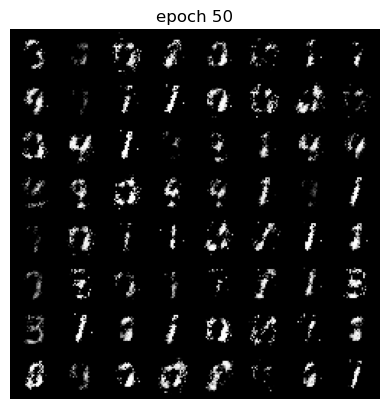

Epoch 50 of 100
Generator loss: 2.52113509, Discriminator loss: 0.64462274


118it [00:27,  4.35it/s]                         


Epoch 51 of 100
Generator loss: 2.55926299, Discriminator loss: 0.66089928


118it [00:27,  4.32it/s]                         


Epoch 52 of 100
Generator loss: 2.58516288, Discriminator loss: 0.60413063


118it [00:28,  4.12it/s]                         


Epoch 53 of 100
Generator loss: 2.49795413, Discriminator loss: 0.63232380


118it [00:27,  4.28it/s]                         


Epoch 54 of 100
Generator loss: 2.65198827, Discriminator loss: 0.56314147


118it [00:27,  4.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


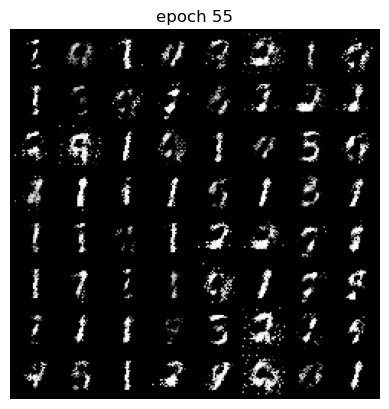

Epoch 55 of 100
Generator loss: 2.75311208, Discriminator loss: 0.58472764


118it [00:29,  4.03it/s]                         


Epoch 56 of 100
Generator loss: 2.50234818, Discriminator loss: 0.62682325


118it [00:28,  4.21it/s]                         


Epoch 57 of 100
Generator loss: 2.32697320, Discriminator loss: 0.63605392


118it [00:27,  4.28it/s]                         


Epoch 58 of 100
Generator loss: 2.59554863, Discriminator loss: 0.59071070


118it [00:27,  4.32it/s]                         


Epoch 59 of 100
Generator loss: 2.58301950, Discriminator loss: 0.57929569


118it [00:27,  4.24it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


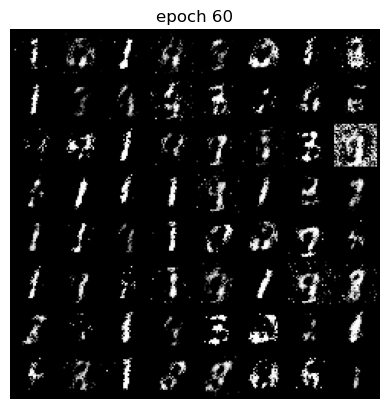

Epoch 60 of 100
Generator loss: 2.49311948, Discriminator loss: 0.60650975


118it [00:27,  4.32it/s]                         


Epoch 61 of 100
Generator loss: 2.59673071, Discriminator loss: 0.58916616


118it [00:27,  4.25it/s]                         


Epoch 62 of 100
Generator loss: 2.55612016, Discriminator loss: 0.63969839


118it [00:27,  4.30it/s]                         


Epoch 63 of 100
Generator loss: 2.76304150, Discriminator loss: 0.56928253


118it [00:27,  4.31it/s]                         


Epoch 64 of 100
Generator loss: 2.76595140, Discriminator loss: 0.57326001


118it [00:26,  4.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


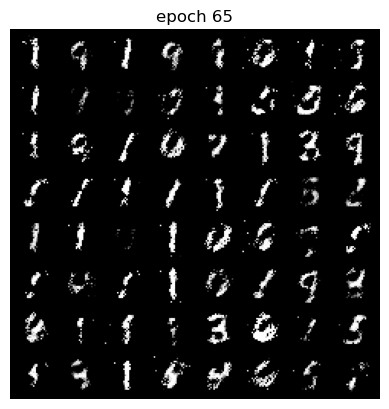

Epoch 65 of 100
Generator loss: 2.92295265, Discriminator loss: 0.51167369


118it [00:27,  4.31it/s]                         


Epoch 66 of 100
Generator loss: 2.84938669, Discriminator loss: 0.56474584


118it [00:27,  4.26it/s]                         


Epoch 67 of 100
Generator loss: 2.67208266, Discriminator loss: 0.62881732


118it [00:28,  4.09it/s]                         


Epoch 68 of 100
Generator loss: 2.49872184, Discriminator loss: 0.64569843


118it [00:27,  4.35it/s]                         


Epoch 69 of 100
Generator loss: 2.53705263, Discriminator loss: 0.61068541


118it [00:28,  4.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


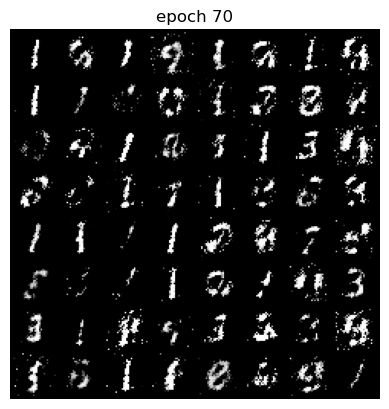

Epoch 70 of 100
Generator loss: 2.29757404, Discriminator loss: 0.69830412


118it [00:28,  4.18it/s]                         


Epoch 71 of 100
Generator loss: 2.51093268, Discriminator loss: 0.62395090


118it [00:27,  4.32it/s]                         


Epoch 72 of 100
Generator loss: 2.67614007, Discriminator loss: 0.55274785


118it [00:27,  4.29it/s]                         


Epoch 73 of 100
Generator loss: 2.55074406, Discriminator loss: 0.61101586


118it [00:27,  4.30it/s]                         


Epoch 74 of 100
Generator loss: 2.13365054, Discriminator loss: 0.71193117


118it [00:28,  4.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


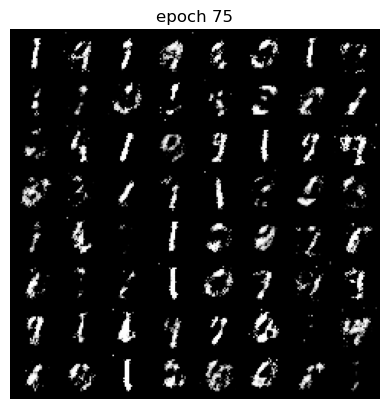

Epoch 75 of 100
Generator loss: 2.22663713, Discriminator loss: 0.70631182


118it [00:33,  3.56it/s]                         


Epoch 76 of 100
Generator loss: 2.24190688, Discriminator loss: 0.70262635


118it [00:31,  3.73it/s]                         


Epoch 77 of 100
Generator loss: 2.19899631, Discriminator loss: 0.69777083


118it [00:31,  3.79it/s]                         


Epoch 78 of 100
Generator loss: 2.27588129, Discriminator loss: 0.68177354


118it [00:29,  3.94it/s]                         


Epoch 79 of 100
Generator loss: 2.41486263, Discriminator loss: 0.65252203


118it [00:30,  3.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


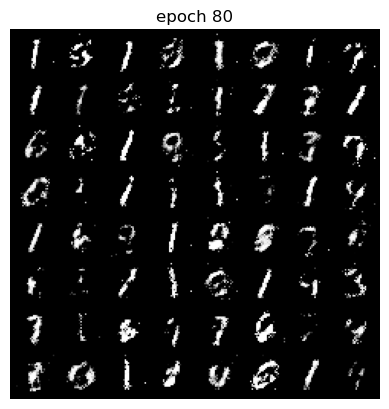

Epoch 80 of 100
Generator loss: 2.22166562, Discriminator loss: 0.69692391


118it [00:30,  3.81it/s]                         


Epoch 81 of 100
Generator loss: 2.30079246, Discriminator loss: 0.69647765


118it [00:30,  3.90it/s]                         


Epoch 82 of 100
Generator loss: 2.31133866, Discriminator loss: 0.67429358


118it [00:27,  4.31it/s]                         


Epoch 83 of 100
Generator loss: 2.24798346, Discriminator loss: 0.70223624


118it [00:27,  4.23it/s]                         


Epoch 84 of 100
Generator loss: 2.09125113, Discriminator loss: 0.75834340


118it [00:27,  4.25it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


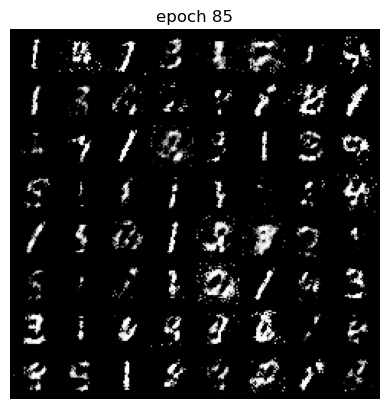

Epoch 85 of 100
Generator loss: 2.08460808, Discriminator loss: 0.75899136


118it [00:27,  4.30it/s]                         


Epoch 86 of 100
Generator loss: 2.01997304, Discriminator loss: 0.76520544


118it [00:27,  4.26it/s]                         


Epoch 87 of 100
Generator loss: 2.15922570, Discriminator loss: 0.74499542


118it [00:27,  4.24it/s]                         


Epoch 88 of 100
Generator loss: 1.97131193, Discriminator loss: 0.78402483


118it [00:27,  4.31it/s]                         


Epoch 89 of 100
Generator loss: 2.05041957, Discriminator loss: 0.75298727


118it [00:27,  4.24it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


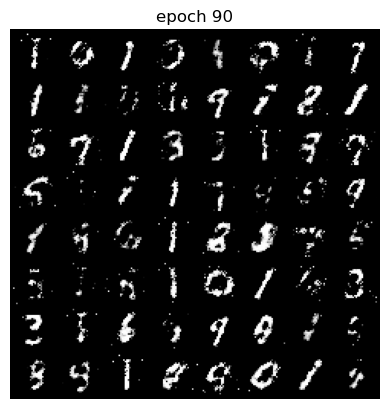

Epoch 90 of 100
Generator loss: 2.02614951, Discriminator loss: 0.79459089


118it [00:27,  4.26it/s]                         


Epoch 91 of 100
Generator loss: 1.95112836, Discriminator loss: 0.80664766


118it [00:27,  4.32it/s]                         


Epoch 92 of 100
Generator loss: 1.95914912, Discriminator loss: 0.81853223


118it [00:29,  4.06it/s]                         


Epoch 93 of 100
Generator loss: 1.92315173, Discriminator loss: 0.80750453


118it [00:27,  4.23it/s]                         


Epoch 94 of 100
Generator loss: 1.92846382, Discriminator loss: 0.81320888


118it [00:27,  4.25it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


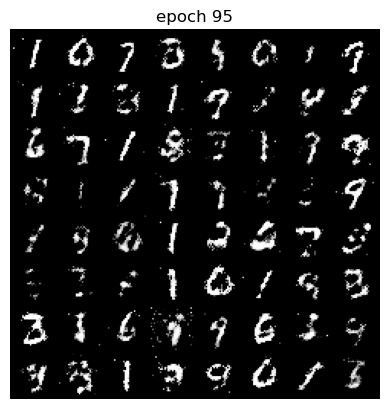

Epoch 95 of 100
Generator loss: 1.97159111, Discriminator loss: 0.79033327


118it [00:28,  4.21it/s]                         


Epoch 96 of 100
Generator loss: 2.01188970, Discriminator loss: 0.82235080


118it [00:27,  4.26it/s]                         


Epoch 97 of 100
Generator loss: 1.92044151, Discriminator loss: 0.81839013


118it [00:27,  4.30it/s]                         


Epoch 98 of 100
Generator loss: 1.91951489, Discriminator loss: 0.83748883


118it [00:27,  4.23it/s]                         


Epoch 99 of 100
Generator loss: 1.97828984, Discriminator loss: 0.81684846


118it [00:27,  4.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


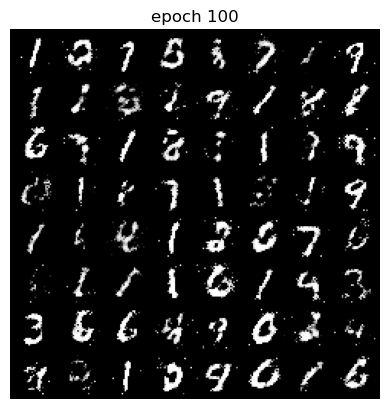

Epoch 100 of 100
Generator loss: 1.91836333, Discriminator loss: 0.80502588


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    loss = criterion(output, true_label)
    return loss
    
    
def discriminator_loss(output, true_label):
    loss = criterion(output, true_label)
    return loss
    


for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        for step in range(k):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            b_size = data_real.size(0)
            real_label = label_real(b_size)
            fake_label = label_fake(b_size)
            optim_d.zero_grad()
            output_real = discriminator(data_real)
            loss_real = discriminator_loss(output_real, real_label)
            output_fake = discriminator(data_fake)
            loss_fake = discriminator_loss(output_fake, fake_label)
            loss_real.backward()
            loss_fake.backward()
            optim_d.step()
            loss_d += loss_real + loss_fake
        data_fake = generator(create_noise(b_size, nz))
        b_size = data_fake.size(0)
        real_label = label_real(b_size)
        optim_g.zero_grad()
        output = discriminator(data_fake)
        loss = generator_loss(output, real_label)
        loss.backward()
        optim_g.step()
        loss_g += loss
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or (epoch + 1) == 1:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs2/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.detach().numpy())
    losses_d.append(epoch_loss_d.detach().numpy())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs2/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs2/generator_images.gif', imgs)

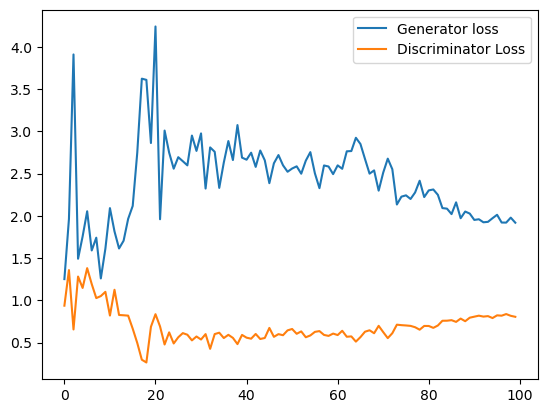

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs2/loss.png')